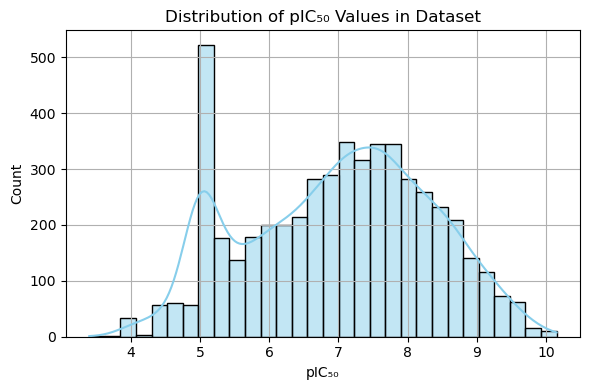

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/bioactml_data.csv")
y = df["pIC50"]

plt.figure(figsize=(6,4))
sns.histplot(y, kde=True, bins=30, color='skyblue')
plt.xlabel("pIC₅₀")
plt.title("Distribution of pIC₅₀ Values in Dataset")
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/pIC50_distribution.png", dpi=300)
plt.show()

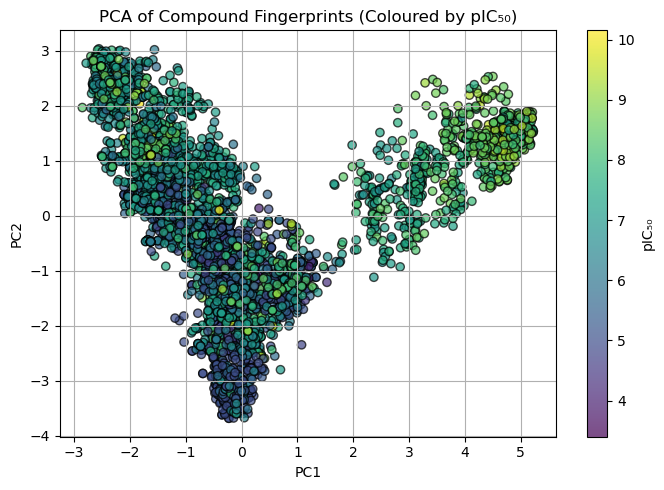

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

with open("../data/X.pkl", "rb") as f:
    X = pickle.load(f)

with open("../data/y.pkl", "rb") as f:
    y = pickle.load(f)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="viridis", edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label="pIC₅₀")
plt.title("PCA of Compound Fingerprints (Coloured by pIC₅₀)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()

plt.savefig("../plots/pca_compound_space.png", dpi=300)
plt.show()

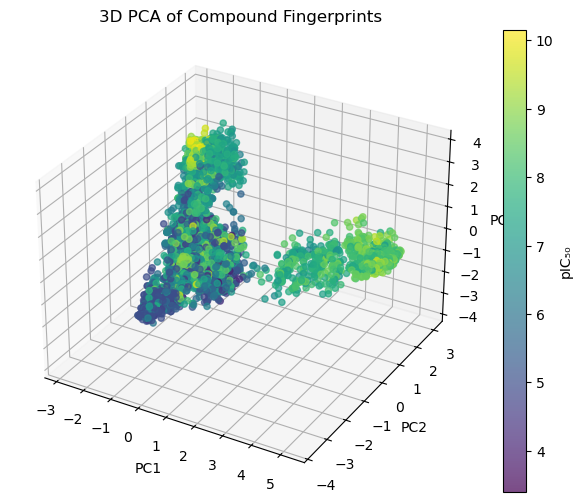

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting
import os

pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis', alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of Compound Fingerprints")
fig.colorbar(scatter, label="pIC₅₀")

os.makedirs("../plots", exist_ok=True)
plt.savefig("../plots/pca_3d_compound_space.png", dpi=300)
plt.show()

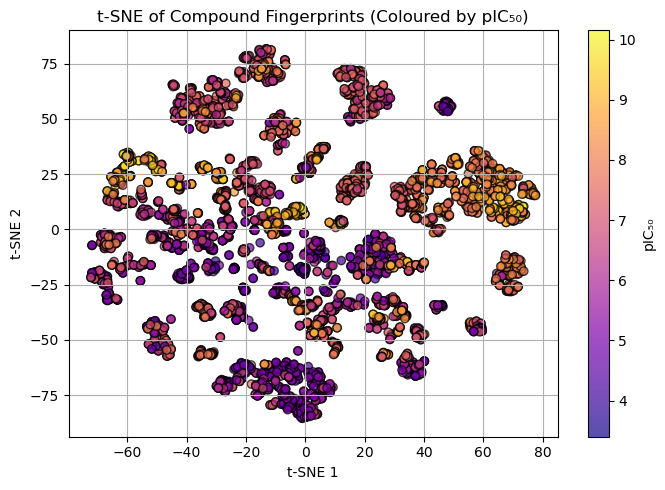

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

with open("../data/X.pkl", "rb") as f:
    X = pickle.load(f)

with open("../data/y.pkl", "rb") as f:
    y = pickle.load(f)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="plasma", edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label="pIC₅₀")
plt.title("t-SNE of Compound Fingerprints (Coloured by pIC₅₀)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()

plt.savefig("../plots/tsne_compound_space.png", dpi=300)
plt.show()